In [32]:
from tensorflow import keras 
from tensorflow import keras as ks
import numpy as np
import pandas as pd
import sklearn as sk
import time
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras import optimizers

from keras import backend as K
from keras import regularizers
from keras import initializers
from tensorflow.keras import layers
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [33]:
# split the data to train and test,
# make sure convert pandas to numpy
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/drive/MyDrive/4050_HW04/train_AFTER_EDA.csv")
df=df.drop(['StudentID','cohort','overall_income'], axis=1)
## pre store the name, will be use later
dfName = list(df.columns)
# print(df.columns)
df = df.to_numpy()


In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
# stratified to split train and test
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 123)
for train_index, test_index in split.split(df, df[:, -1]): 
  train_set = df[train_index, :]
  test_set = df[test_index, :]
# print(len(train_set))
# print(len(test_set))

In [35]:
# set hyper-parameters
batch_size = 128
num_classes = 2
epochs = 5

In [36]:
# 重新设回dataframe，但是缺失column name
train_set = pd.DataFrame(train_set)
test_set = pd.DataFrame(test_set)

# 重新赋值column name, 用 dfName
train_set.columns = dfName
test_set.columns = dfName

## One hot encoding since "unsupported object type int"
for features in train_set.columns: 
  if train_set[features].dtype == "object": 
    train_set[features] = pd.Categorical(train_set[features]).codes

for features in test_set.columns: 
  if test_set[features].dtype == "object": 
    test_set[features] = pd.Categorical(test_set[features]).codes

x_train=train_set.drop(['Dropout'], axis=1)
x_test=test_set.drop(['Dropout'], axis=1)
## try
# x_train = train_set
# x_test = test_set

y_train=train_set['Dropout']
y_test=test_set['Dropout']

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(9808, 28)
(2452, 28)
(9808,)
(2452,)


In [37]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# 1. Neural network with one hidden layer, using sigmoid activation function, momentum stochastic gradient descent, and dropouts.

In [38]:
# set hyper-parameters
batch_size = 128
num_classes = 2
epochs = 4

In [39]:
## Create the network layer
## one hidden layer
model = Sequential()
model.add(Dense(58, activation = "sigmoid", input_shape = (28, )))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = "sigmoid"))

model.summary()

## Momentum Stochastic Gradient Descent
sgd = ks.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)

## compile the model
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 58)                1682      
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 118       
                                                                 
Total params: 1,800
Trainable params: 1,800
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()
type(Y_train)

numpy.ndarray

In [41]:
## Fit the model on training set
start_time = time.time()
history = model.fit(x_train, Y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 1)
print("Training duration : ", time.time() - start_time)

## saving the model
model.save("/content/drive/MyDrive/4050_HW04/onehidden.h5")


Epoch 1/4
77/77 [==============================] - 1s 2ms/step - loss: 0.7048 - accuracy: 0.5906
Epoch 2/4
77/77 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6150
Epoch 3/4
77/77 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6210
Epoch 4/4
77/77 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6247
Training duration :  1.75050950050354


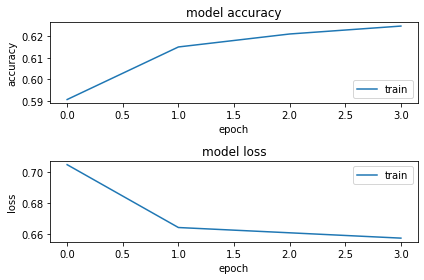

In [42]:
## plotting the metrics
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Measure Performance

In [43]:
score = model.evaluate(x_test, Y_test, batch_size=3)

print("Network test score [loss, accuracy]:", score)

818/818 [==============================] - 1s 1ms/step - loss: 0.6524 - accuracy: 0.6330
Network test score [loss, accuracy]: [0.6524078845977783, 0.6329526901245117]


In [44]:
## Create predictions on the test set
mnist_model = load_model("/content/drive/MyDrive/4050_HW04/onehidden.h5")

predicted_classes = np.argmax(mnist_model.predict(x_test), axis = 1)
print(predicted_classes.shape)
print(y_test.shape)
print(predicted_classes)

print(y_test)


77/77 [==============================] - 0s 1ms/step
(2452,)
(2452,)
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]


In [45]:
## see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
# print(correct_indices)
print(len(correct_indices), " classified correctly")
print(len(incorrect_indices), " classified incorrectly")

1552  classified correctly
900  classified incorrectly


# 2.Neural network with three hidden layers, using relu activation function, Nesterov momentum stochastic gradient descent, dropouts, L2 regularization and random Gaussian weight initialization with 1/sqrt(n) standard deviation.

In [46]:
# set hyper-parameters
batch_size = 128
num_classes = 2
epochs = 5

In [47]:
## Create the network layer
## one hidden layer
import math
model = Sequential()
# 1
model.add(Dense(256, activation = "relu", input_shape = (28, ), 
                kernel_regularizer = regularizers.l2(0.001), 
                kernel_initializer=initializers.RandomNormal(mean=0, stddev = 1/math.sqrt(28))))
model.add(Dropout(0.2))
# 2
model.add(Dense(128, activation = "relu" ))
model.add(Dropout(0.25))
# 3
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation = "softmax"))

model.summary()

## Momentum Stochastic Gradient Descent
sgd = ks.optimizers.SGD(learning_rate = 0.1, decay = 1e-8, momentum = 0.9, 
                        nesterov = True, clipnorm = 1)

## compile the model
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               7424      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                

In [48]:
start_time = time.time()
history = model.fit(x_train, Y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 1)
print("Training duration : ", time.time() - start_time)

## saving the model
model.save("/content/drive/MyDrive/4050_HW04/threehidden.h5")

Epoch 1/5
77/77 [==============================] - 1s 5ms/step - loss: 17.4382 - accuracy: 0.5960
Epoch 2/5
77/77 [==============================] - 0s 6ms/step - loss: 0.8554 - accuracy: 0.6140
Epoch 3/5
77/77 [==============================] - 0s 6ms/step - loss: 0.9781 - accuracy: 0.6136
Epoch 4/5
77/77 [==============================] - 0s 5ms/step - loss: 0.7901 - accuracy: 0.6140
Epoch 5/5
77/77 [==============================] - 0s 6ms/step - loss: 0.7441 - accuracy: 0.6140
Training duration :  3.3496289253234863


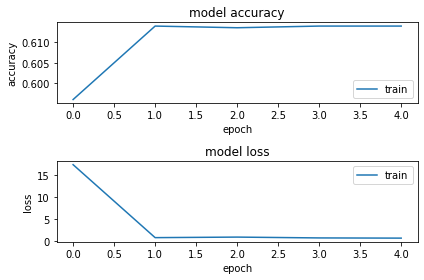

In [49]:
## plotting the metrics
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [50]:
score = model.evaluate(x_test, Y_test, batch_size=16)

print("Network test score [loss, accuracy]:", score)

154/154 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.6138
Network test score [loss, accuracy]: [0.7324616312980652, 0.613784670829773]


In [51]:
## Create predictions on the test set
mnist_model = load_model("/content/drive/MyDrive/4050_HW04/threehidden.h5")

predicted_classes = np.argmax(mnist_model.predict(x_test), axis = 1)
print(predicted_classes.shape)
print(y_test.shape)
print(predicted_classes)

print(y_test)


77/77 [==============================] - 0s 2ms/step
(2452,)
(2452,)
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]


In [52]:
## see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
# print(correct_indices)
print(len(correct_indices), " classified correctly")
print(len(incorrect_indices), " classified incorrectly")

1505  classified correctly
947  classified incorrectly


# 3.Neural network with two hidden layers, use gradient descent, regularization of your choice. Use keras tuner to determine the optimal number of neurons in each layer and also to determine the learning rate and the activation function to use.

In [53]:
# set hyper-parameters
batch_size = 128
num_classes = 2
epochs = 5

### set up learning rate

In [54]:
import tensorflow
# Set up learning rate
## exponential Decay
initial_learning_rate = 0.1
exponential = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Piecewise Constant Decay ===> learning rate nan
step = tensorflow.Variable(0, trainable=False)
boundaries = [100000, 110000]
values = [1.0, 0.5, 0.1]
piecewise = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)
# Later, whenever we perform an optimization step, we pass in the step.
# learning_rate = piecewise(step)

# Polynomial Decay ====> best performance
starter_learning_rate = 0.1
end_learning_rate = 0.01
decay_steps = 10000
polynomial = keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate,
    power=0.5)



### build model

In [55]:
try: 
  import keras_tuner
except: 
  !pip install keras-tuner --upgrade
finally: 
  import keras_tuner

def build_model(hp):
    model = keras.Sequential()
    # model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=16, max_value=1024, step=4),
                activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
            )
        )
        #
        model.add(layers.BatchNormalization())
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.2))
    #    
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation="sigmoid"))
    # normalize output
    # model.add(layers.BatchNormalization())
    learning_rate = hp.Float("lr", min_value=1e-8, max_value=1e-1, sampling="log")
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=polynomial),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

build_model(keras_tuner.HyperParameters())

In [56]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=2,
    executions_per_trial=3,
    overwrite=True,
    directory="/content/drive/MyDrive/4050_HW04/",
    project_name="tuner",
)


In [57]:
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

In [58]:
tuner.search(x = x_train, y = Y_train, epochs = 4, 
             batch_size = 128,
             validation_data = (x_test, Y_test))

Trial 2 Complete [00h 00m 16s]
val_accuracy: 0.6160957217216492

Best val_accuracy So Far: 0.6373028755187988
Total elapsed time: 00h 00m 29s


In [59]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/4050_HW04/tuner
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 3
units_0: 720
activation: tanh
dropout: True
lr: 6.724858873457598e-08
units_1: 16
units_2: 16
Score: 0.6373028755187988
Trial summary
Hyperparameters:
num_layers: 3
units_0: 112
activation: sigmoid
dropout: True
lr: 3.531390783721339e-08
units_1: 208
units_2: 224
Score: 0.6160957217216492


In [60]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.build(input_shape=(None, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 720)               20880     


 batch_normalization (BatchN  (None, 720)              2880      


 ormalization)                                                   


 dense_1 (Dense)             (None, 16)                11536     


 batch_normalization_1 (Batc  (None, 16)               64        


 hNormalization)                                                 


 dense_2 (Dense)             (None, 16)                272       


 batch_normalization_2 (Batc  (None, 16)               64        


 hNormalization)                                                 


                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 35,794
Trainable params: 34,258
Non-trainable params: 1,536
_________________________________________________________________


In [61]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(2)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((x_train, x_test))
y_all = np.concatenate((Y_train, Y_test))
model.fit(x=x_all, y=y_all, epochs=4)

Epoch 1/4
384/384 [==============================] - 2s 3ms/step - loss: 0.6738 - accuracy: 0.6016
Epoch 2/4
384/384 [==============================] - 1s 3ms/step - loss: 0.6588 - accuracy: 0.6192
Epoch 3/4
384/384 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.6230
Epoch 4/4
384/384 [==============================] - 1s 3ms/step - loss: 0.6549 - accuracy: 0.6236


In [62]:
score = model.evaluate(x_test, Y_test, batch_size=16)

print("Network test score [loss, accuracy]:", score)

154/154 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6236
Network test score [loss, accuracy]: [0.6542794704437256, 0.623572587966919]


# 4.Choose epoch and mini batch size for all three of the architectures by experimenting with different values

In [63]:
## I have all tried some values of epoch and batch size in the three models. 

# 5.Write a paragraph about how the neural network models compare in accuracy to the models you tried for the midterm.

Actually, I don't get a good accuracy as I got from midterm. I tried couples of parameters including epochs, batch_size. I even tried to put different learning_rate from functions that relates to decay, but I still got an accuracy around 0.61+ something. Even if I used keras.tuner, it doesn't go well. 

But then I looked online, some people tell that we cannot use the Flatten Layer because that layer will reshape the dimension to one, which will cause a bad accuracy. I also found out to use Batch_Normalization in order to normalize my output of neruos for each layer because in binary problem, the ln(-0.5) is around 0.69, that will also cause the accuracy rate to be not high enough. 

Finally, I got my accuracy around 0.73, that is not bad but there are still some differences between the score that I got from midterm. But I think that is already the best I got, and the value is somewhat related to the value when I ran logistic regression which I also got a value of 0.72+. 